<a href="https://colab.research.google.com/github/ernesmf23/ML-y-Analisis-de-Datos/blob/main/Analisis_datos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. CARGAR BASES DE DATOS

In [ ]:
# Importar todas las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, precision_recall_curve)
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time

In [ ]:
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# 1. Cargar los datos
from google.colab import files
uploaded = files.upload()  # Sube tu archivo predictive_maintenance.csv

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [ ]:
# Leer el dataset
df = pd.read_csv('predictive_maintenance.csv')

In [ ]:
# Mostrar las primeras filas
print(df.head())

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target  Type_L  Type_M  
0         42.8                0       0   False    True  
1         46.3                3       0    True   False  
2         49.4                5       0    True   False  
3         39.5                7       0    True   False  
4         40.0                9       0    True   False  


#2. ANALISIS EXPLORATORIO

In [ ]:
# 2. Análisis exploratorio de datos
print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nDistribución de la variable objetivo:")
print(df['Target'].value_counts())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None

Estadísticas descriptivas:
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             1

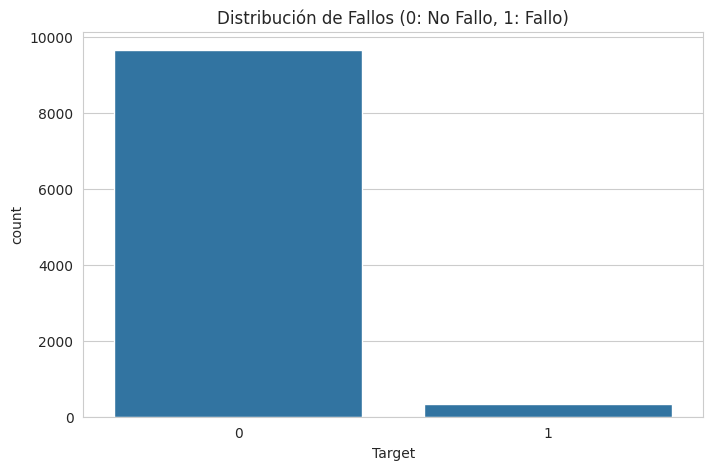

In [ ]:
# Visualizar la distribución de fallos
plt.figure(figsize=(8, 5))
sns.countplot(x='Target', data=df)
plt.title('Distribución de Fallos (0: No Fallo, 1: Fallo)')
plt.show()

#3. PREPROCESAMIENTO

In [ ]:
# 3. Preprocesamiento de datos
# Eliminar columnas no relevantes para el modelo
df = df.drop(['UDI', 'Product ID', 'Failure Type'], axis=1)

In [ ]:
# Codificar variables categóricas (Type)
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

In [ ]:
# Separar características (X) y variable objetivo (y)
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#4. MODELAMIENTO Y EVALUACIÓN

In [ ]:
# 4. Definición de modelos y parámetros para GridSearch
models = {
    'Regresión Logística': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'SVM': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}


=== Entrenando Regresión Logística ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2898
           1       0.63      0.17      0.26       102

    accuracy                           0.97      3000
   macro avg       0.80      0.58      0.62      3000
weighted avg       0.96      0.97      0.96      3000



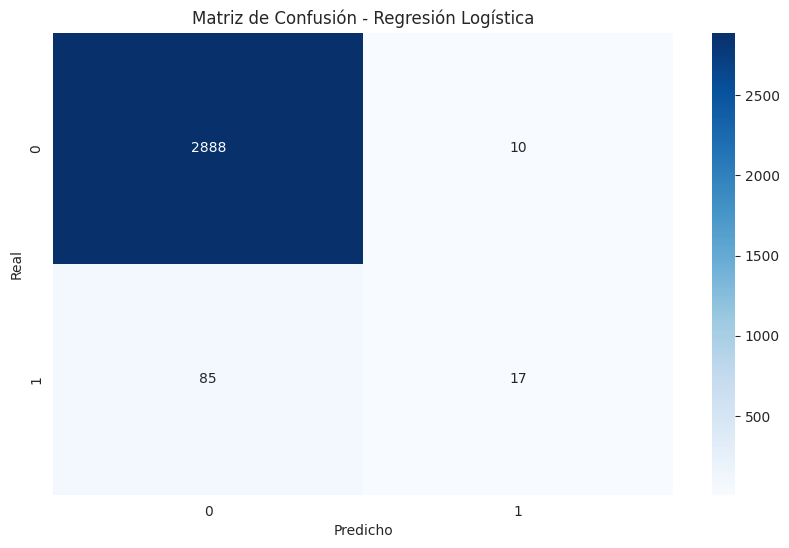

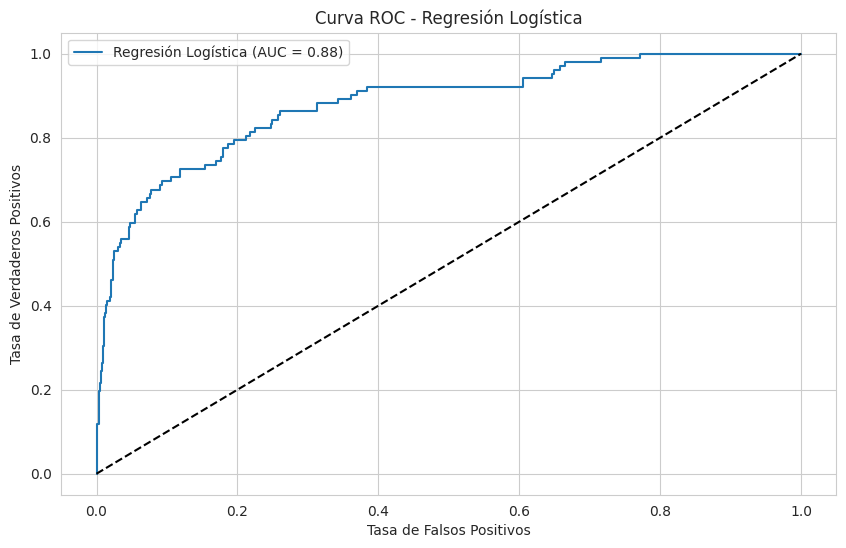


=== Entrenando Random Forest ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2898
           1       0.84      0.40      0.54       102

    accuracy                           0.98      3000
   macro avg       0.91      0.70      0.77      3000
weighted avg       0.97      0.98      0.97      3000



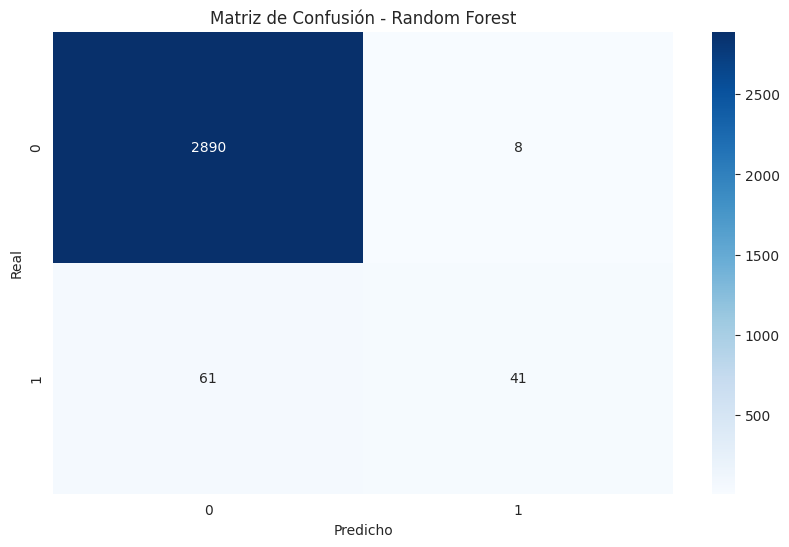

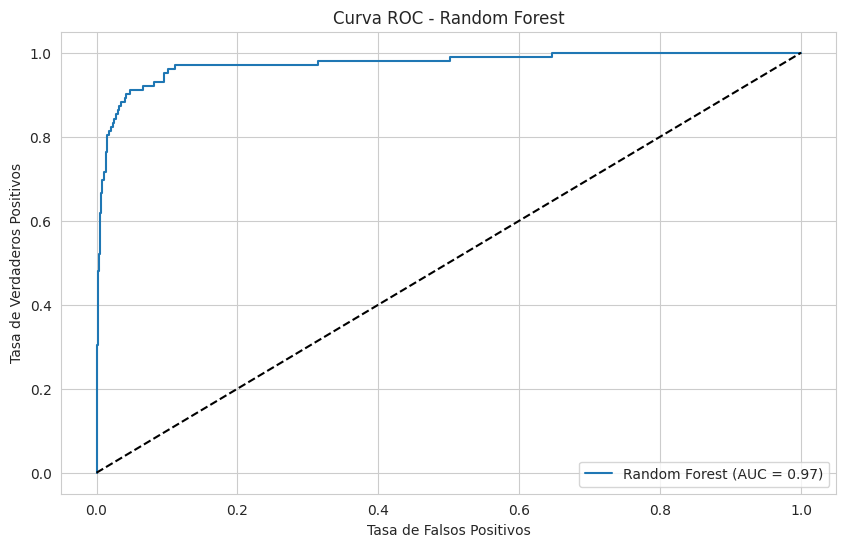


=== Entrenando SVM ===
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Reporte de clasificación para SVM:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2898
           1       0.77      0.43      0.55       102

    accuracy                           0.98      3000
   macro avg       0.88      0.71      0.77      3000
weighted avg       0.97      0.98      0.97      3000



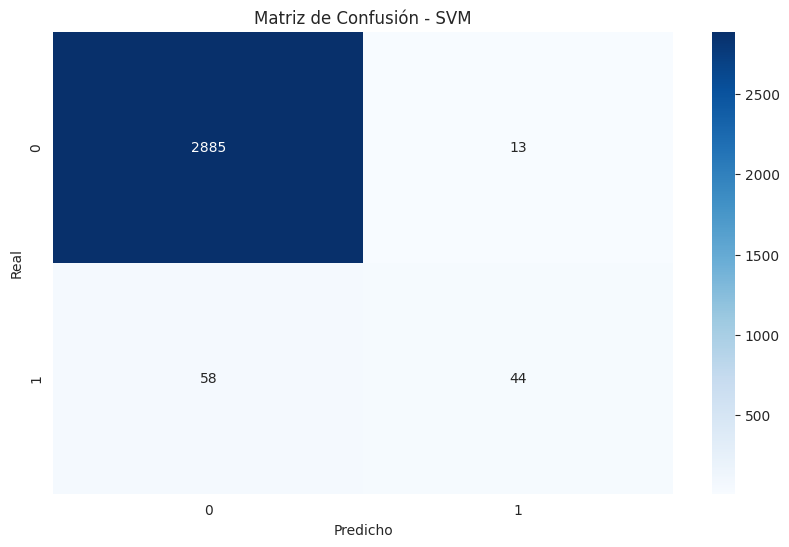

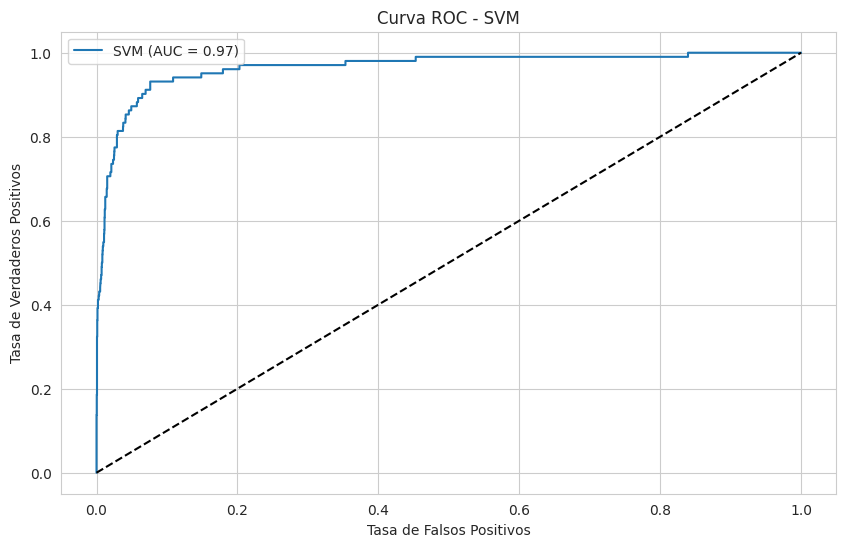


=== Entrenando XGBoost ===
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Reporte de clasificación para XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2898
           1       0.85      0.62      0.72       102

    accuracy                           0.98      3000
   macro avg       0.92      0.81      0.85      3000
weighted avg       0.98      0.98      0.98      3000



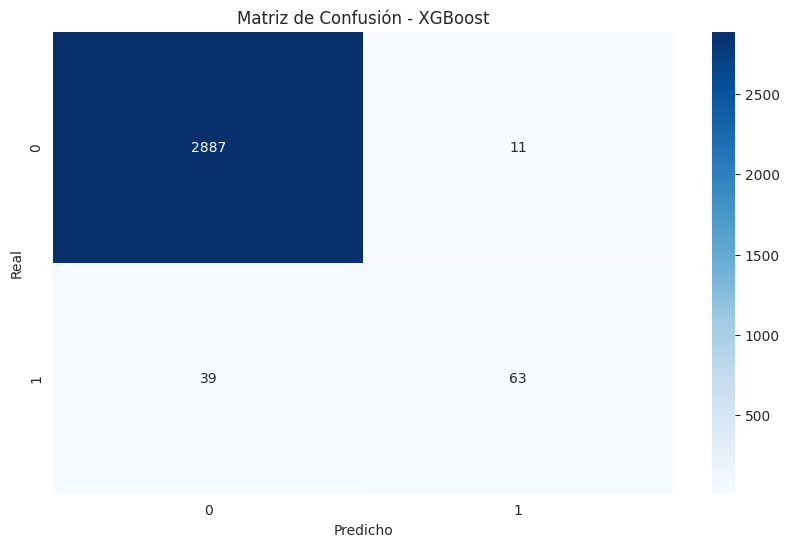

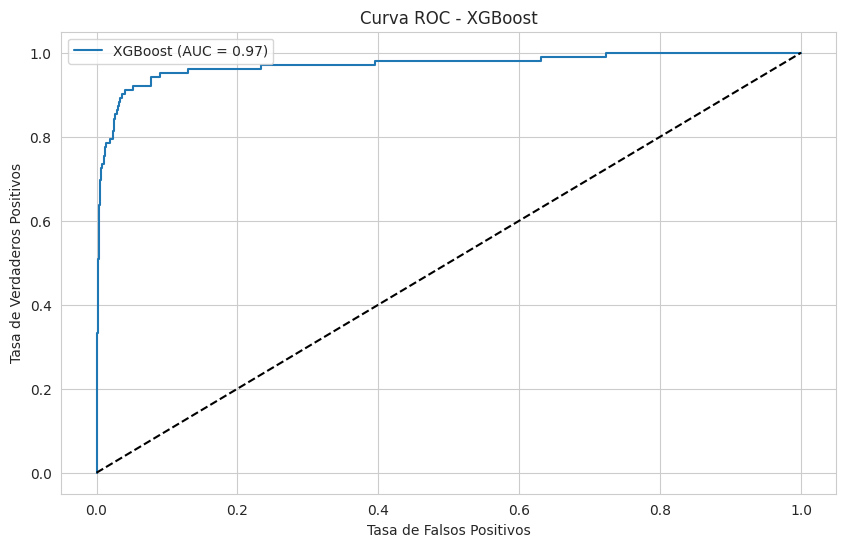

In [ ]:
# 4.1 Entrenamiento y evaluación de modelos
results = []

for model_name, model_info in models.items():
    print(f"\n=== Entrenando {model_name} ===")
    start_time = time.time()

    # GridSearchCV para optimización de hiperparámetros
    grid = GridSearchCV(estimator=model_info['model'],
                       param_grid=model_info['params'],
                       cv=5,
                       scoring='roc_auc',
                       n_jobs=-1,
                       verbose=1)

    grid.fit(X_train_scaled, y_train)

    # Mejor modelo
    best_model = grid.best_estimator_

    # Predicciones
    y_pred = best_model.predict(X_test_scaled)
    y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

    # Tiempo de entrenamiento
    training_time = time.time() - start_time

    # Guardar resultados
    results.append({
        'Modelo': model_name,
        'Mejores Parámetros': grid.best_params_,
        'Precisión': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Accuracy (mean)': np.mean(cv_scores),
        'CV Accuracy (std)': np.std(cv_scores),
        'Tiempo Entrenamiento (s)': training_time
    })

    # Mostrar reporte de clasificación
    print(f"\nReporte de clasificación para {model_name}:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend()
    plt.show()

#5. COMPARACION DE MODELOS

In [ ]:
# 5. Comparación de modelos
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC-AUC', ascending=False)

print("\n=== Comparación de Modelos ===")
print(results_df.to_string(index=False))


=== Comparación de Modelos ===
             Modelo                                                                                     Mejores Parámetros  Precisión  Precision   Recall  F1-Score  ROC-AUC  CV Accuracy (mean)  CV Accuracy (std)  Tiempo Entrenamiento (s)
            XGBoost {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}   0.976000   0.617188 0.774510  0.686957 0.980118            0.979714           0.002579                 47.021299
      Random Forest                  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}   0.977000   0.836735 0.401961  0.543046 0.973728            0.980143           0.002688                107.911607
                SVM                                                           {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}   0.976333   0.771930 0.431373  0.553459 0.965279            0.978571           0.001629                 46.446157
Regresión Logíst

In [ ]:
from IPython.display import display, HTML

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results)

# Ordenar por ROC-AUC descendente
results_df = results_df.sort_values('ROC-AUC', ascending=False)

# Formatear la tabla para mejor visualización
results_display = results_df[['Modelo', 'ROC-AUC', 'F1-Score', 'Recall', 'Precision', 'Precisión', 'Tiempo Entrenamiento (s)']].copy()
results_display.columns = ['Modelo', 'ROC-AUC', 'F1-Score', 'Recall', 'Precisión', 'Accuracy', 'Tiempo (s)']

# Redondear valores decimales
results_display = results_display.round(4)

# Mostrar tabla con estilo
display(HTML(results_display.to_html(index=False, border=1)))

# Opción alternativa para copiar fácilmente (formato Markdown)
print("\n=== TABLA PARA COPIAR (Markdown) ===")
print(results_display.to_markdown(index=False, tablefmt="grid"))

# Opción para copiar como texto plano
print("\n=== TABLA PARA COPIAR (Texto Plano) ===")
print(results_display.to_string(index=False))

Modelo,ROC-AUC,F1-Score,Recall,Precisión,Accuracy,Tiempo (s)
XGBoost,0.9801,0.6870,0.7745,0.6172,0.9760,47.0213
Random Forest,0.9737,0.5430,0.4020,0.8367,0.9770,107.9116
SVM,0.9653,0.5535,0.4314,0.7719,0.9763,46.4462
Regresión Logística,0.8809,0.2636,0.1667,0.6296,0.9683,4.3395



=== TABLA PARA COPIAR (Markdown) ===
+---------------------+-----------+------------+----------+-------------+------------+--------------+
| Modelo              |   ROC-AUC |   F1-Score |   Recall |   Precisión |   Accuracy |   Tiempo (s) |
+=====================+===========+============+==========+=============+============+==============+
| XGBoost             |    0.9801 |     0.687  |   0.7745 |      0.6172 |     0.976  |      47.0213 |
+---------------------+-----------+------------+----------+-------------+------------+--------------+
| Random Forest       |    0.9737 |     0.543  |   0.402  |      0.8367 |     0.977  |     107.912  |
+---------------------+-----------+------------+----------+-------------+------------+--------------+
| SVM                 |    0.9653 |     0.5535 |   0.4314 |      0.7719 |     0.9763 |      46.4462 |
+---------------------+-----------+------------+----------+-------------+------------+--------------+
| Regresión Logística |    0.8809 |     0.26

<ipython-input-36-9339b1cde525>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Modelo', data=results_df, palette='viridis')
<ipython-input-36-9339b1cde525>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Modelo', data=results_df, palette='viridis')
<ipython-input-36-9339b1cde525>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Modelo', data=results_df, palette='viridis')
<ipython-input-36-9339b1cde525>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

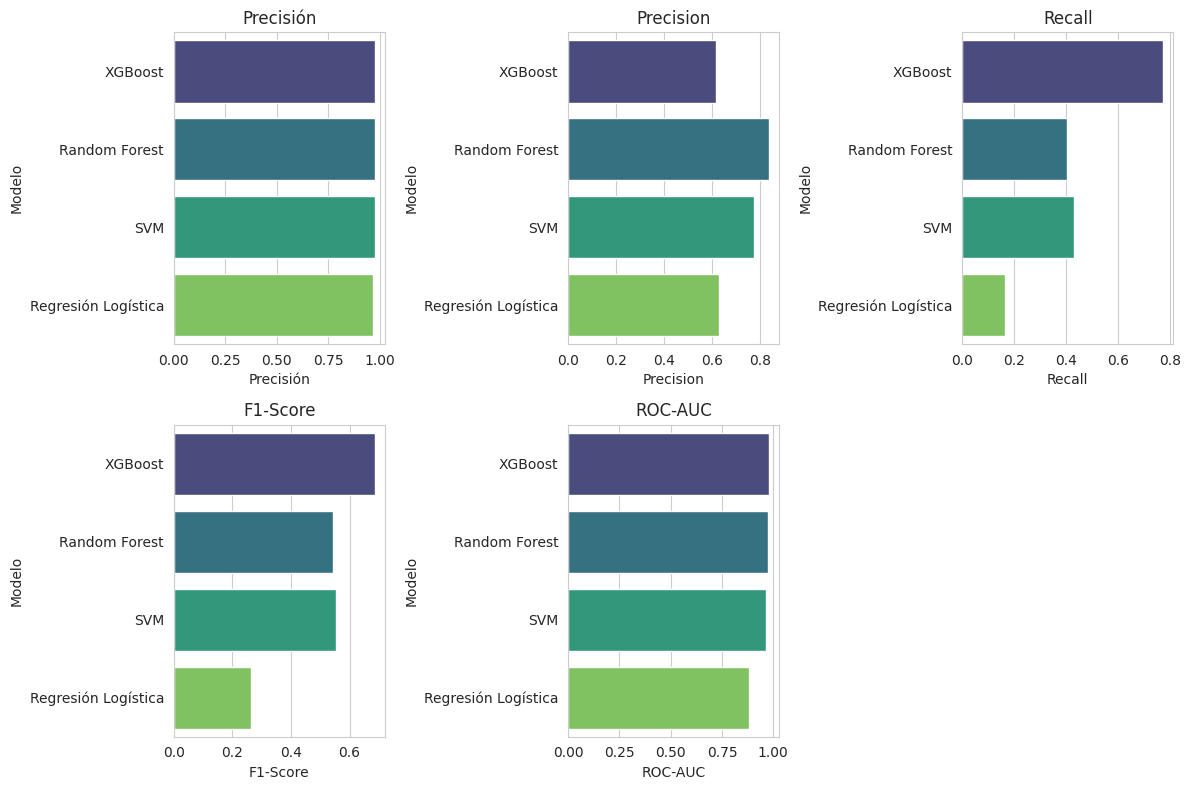

In [ ]:
# Visualización comparativa
plt.figure(figsize=(12, 8))
metrics = ['Precisión', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=metric, y='Modelo', data=results_df, palette='viridis')
    plt.title(metric)
plt.tight_layout()
plt.show()

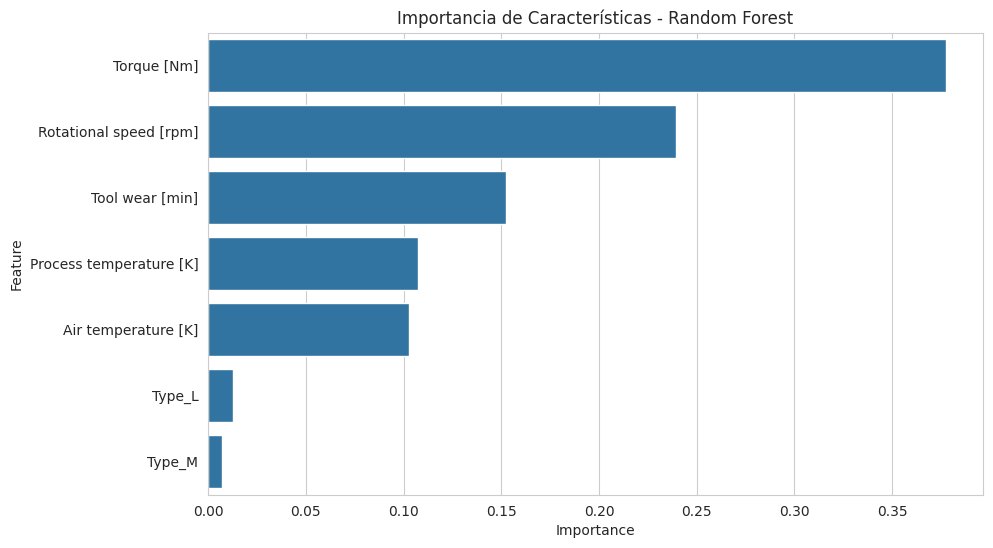

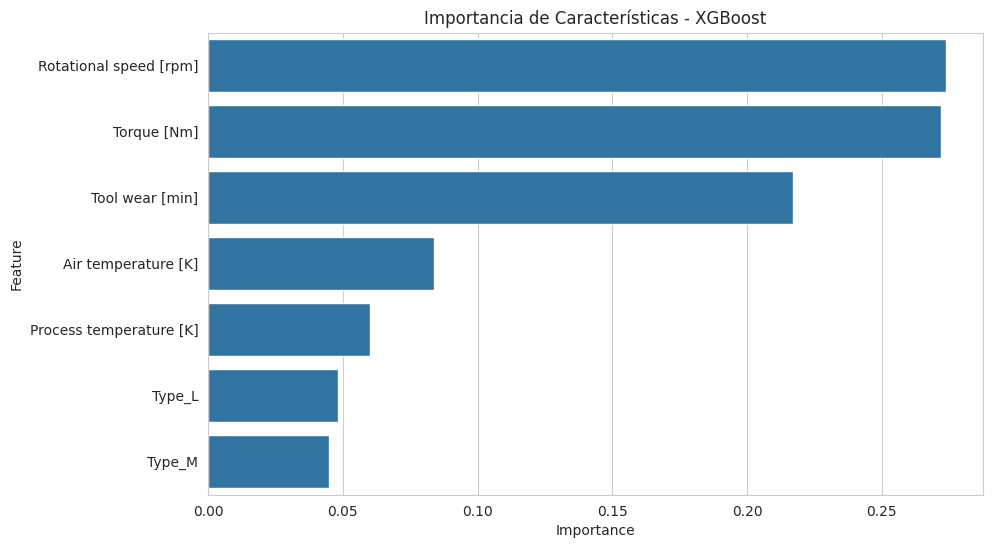

In [ ]:
# 5. Importancia de características (para modelos que lo soportan)
feature_importance_results = {}

for model_name, model_info in models.items():
    best_model = model_info['model'].__class__.__name__

    if best_model in ['RandomForestClassifier', 'XGBClassifier']:
        # Obtener el mejor modelo entrenado
        grid = GridSearchCV(estimator=model_info['model'],
                          param_grid=model_info['params'],
                          cv=5,
                          scoring='roc_auc')
        grid.fit(X_train_scaled, y_train)
        best_model = grid.best_estimator_

        # Obtener importancia de características
        if best_model.__class__.__name__ == 'RandomForestClassifier':
            importances = best_model.feature_importances_
        elif best_model.__class__.__name__ == 'XGBClassifier':
            importances = best_model.feature_importances_

        # Crear DataFrame de importancia
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        feature_importance_results[model_name] = importance_df

        # Visualizar importancia
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'Importancia de Características - {model_name}')
        plt.show()

In [ ]:
# 6. Análisis de trade-off Precision-Recall para el mejor modelo
best_model_name = results_df.iloc[0]['Modelo']
print(f"\n=== Análisis detallado del mejor modelo: {best_model_name} ===")

# Obtener el mejor modelo
grid = GridSearchCV(estimator=models[best_model_name]['model'],
                   param_grid=models[best_model_name]['params'],
                   cv=5,
                   scoring='roc_auc')
grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_



=== Análisis detallado del mejor modelo: XGBoost ===


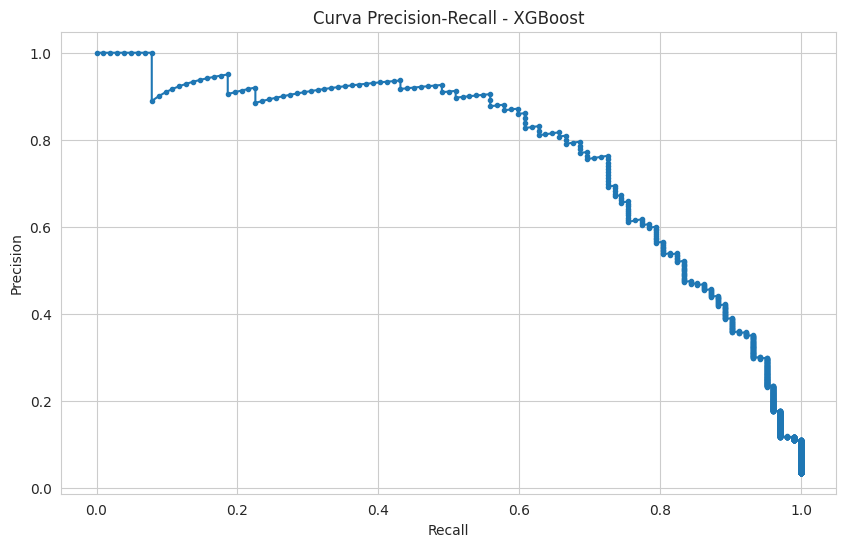

Umbral óptimo: 0.7234

Métricas con umbral óptimo:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2898
           1       0.76      0.73      0.74       102

    accuracy                           0.98      3000
   macro avg       0.88      0.86      0.87      3000
weighted avg       0.98      0.98      0.98      3000



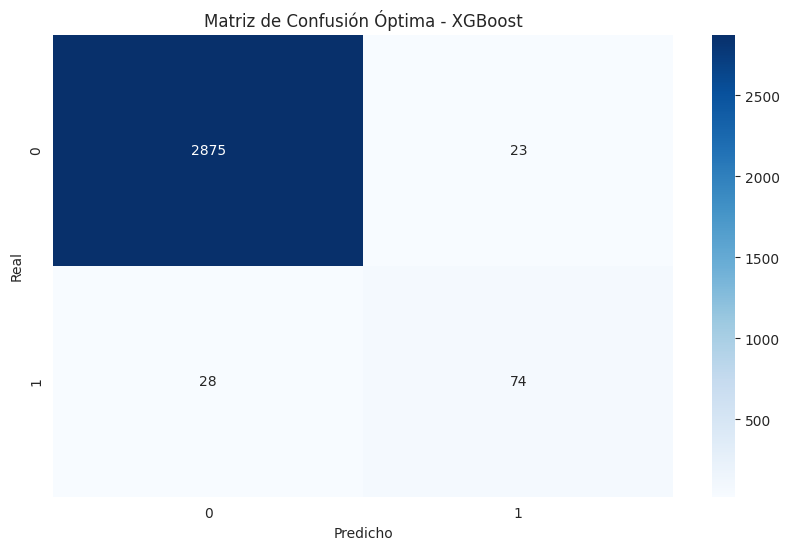

In [ ]:
# Predecir probabilidades
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Curva Precision-Recall - {best_model_name}')
plt.show()

# Encontrar el umbral óptimo (punto más cercano a (1,1))
fscore = (2 * precision * recall) / (precision + recall + 1e-9)
ix = np.argmax(fscore)
optimal_threshold = thresholds[ix]
print(f"Umbral óptimo: {optimal_threshold:.4f}")

# Aplicar umbral óptimo
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

# Métricas con umbral óptimo
print("\nMétricas con umbral óptimo:")
print(classification_report(y_test, y_pred_optimal))

# Matriz de confusión óptima
cm = confusion_matrix(y_test, y_pred_optimal)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión Óptima - {best_model_name}')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()